<a href="https://colab.research.google.com/github/AlbertoZamarchi/Mineracao-Dados/blob/main/Nobel_1901_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desvendando o Nobel: Uma Análise Exploratória pelos Prêmios de 1901 a 2022



## Objetivos:


*   Fornecer um panorama histórico dos Prêmios Nobel concedidos de 1901 a 2022, enfatizando os períodos em que os prêmios não foram concedidos devido a eventos globais como a Primeira e a Segunda Guerra Mundial.

*   Analisar a distribuição dos Prêmios Nobel em diferentes categorias (Física, Química, Medicina, Literatura, Paz e Ciências Econômicas) e identificar quaisquer padrões ou tendências discerníveis.

* Compreender os perfis demográficos dos laureados com o Prêmio Nobel, incluindo nacionalidade, idade e distribuição de gênero, e investigar se houve mudanças ao longo do tempo.

* Identificar indivíduos ou organizações que receberam vários prêmios Nobel e fornecer uma breve visão geral de suas contribuições.

* Avaliar a influência de eventos sócio-políticos globais na premiação dos Prêmios Nobel, incluindo possíveis vieses no processo de premiação.

* Analisar a evolução e o impacto do Prêmio em Ciências Econômicas, que foi adicionado posteriormente em relação aos Prêmios Nobel originais.

* Usar o conjunto de dados da API do Prêmio Nobel como base para a análise, garantindo que as descobertas sejam confiáveis, atualizadas e abrangentes.

* Fornecer recomendações para futuras direções de pesquisa com base nas lacunas e tendências identificadas no conjunto de dados atual.

* Comunicar efetivamente essas descobertas tanto para um público acadêmico quanto para um leigo interessado nos Prêmios Nobel.

* PERGUNTA PARA RESPONDER PARA O PROFESSOR: Qual é a tendencia atual (2010 para frente)






In [ ]:
import numpy as np
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Link: https://drive.google.com/file/d/1LiocynxbrYZN5SFlyhELKdUfqvk2AcGr/view?usp=drive_link
!gdown 1LiocynxbrYZN5SFlyhELKdUfqvk2AcGr

Downloading...
From: https://drive.google.com/uc?id=1LiocynxbrYZN5SFlyhELKdUfqvk2AcGr
To: /content/nobel_latest.csv
100% 239k/239k [00:00<00:00, 73.4MB/s]


# 1. Lendo o Banco de Dados

In [ ]:
df = pd.read_csv('nobel_latest.csv')

In [ ]:
df

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country
0,1901,1,Wilhelm Conrad,Röntgen,physics,male,1,"""in recognition of the extraordinary services ...",1845-03-27,Prussia (now Germany),Lennep (now Remscheid),DE,10-02-1923,Germany,Munich,DE,Munich University,Munich,Germany
1,1901,293,Emil,von Behring,medicine,male,1,"""for his work on serum therapy especially its ...",1854-03-15,Prussia (now Poland),Hansdorf (now Lawice),PL,31-03-1917,Germany,Marburg,DE,Marburg University,Marburg,Germany
2,1901,462,Henry,Dunant,peace,male,2,"""for his humanitarian efforts to help wounded ...",1828-05-08,Switzerland,Geneva,CH,30-10-1910,Switzerland,Heiden,CH,NaN,NaN,NaN
3,1901,463,Frédéric,Passy,peace,male,2,"""for his lifelong work for international peace...",1822-05-20,France,Paris,FR,12-06-1912,France,Paris,FR,NaN,NaN,NaN
4,1901,569,Sully,Prudhomme,literature,male,1,"""in special recognition of his poetic composit...",1839-03-16,France,Paris,FR,07-09-1907,France,Châtenay,FR,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2022,1011,Svante,Pääbo,medicine,male,1,"""for his discoveries concerning the genomes of...",20-04-1955,Sweden,Stockholm,SE,0000-00-00,NaN,NaN,NaN,Max Planck Institute for Evolutionary Anthropo...,Leipzig,Germany
985,2022,743,Barry,Sharpless,chemistry,male,3,"""for the development of click chemistry and bi...",28-04-1941,USA,Philadelphia PA,US,0000-00-00,NaN,NaN,NaN,Scripps Research,La Jolla CA,USA
986,2022,1022,Douglas,Diamond,economics,male,3,"""for research on banks and financial crises""",25-10-1953,USA,Chicago IL,US,0000-00-00,NaN,NaN,NaN,University of Chicago,Chicago IL,USA
987,2022,1015,Carolyn,Bertozzi,chemistry,female,3,"""for the development of click chemistry and bi...",10-10-1966,USA,Boston MA,US,0000-00-00,NaN,NaN,NaN,Stanford University,Stanford CA,USA


#Dica: https://www.kaggle.com/code/prithusharma1/analysis-of-nobel-laureates-1901-2022

#2. Pré-processamento de dados


2.1 Limpeza de dados e tratamento de valores nulos.

In [ ]:
df.isnull().sum()

Year                      0
Laureate_Id               0
Firstname                 0
Lastname                 32
Category                  0
Gender                    0
Prize_Share               0
Motivation                0
Birth_Date                0
Birth_Country            31
Birth_City               33
Birth_Country_Code       31
Death_Date                0
Death_Country           343
Death_City              349
Death_Country_Code      343
Organization_Name       262
Organization_City       267
Organization_Country    265
dtype: int64

2.1.1 Lidando com valores nulos em "Lastname".

Preenchendo os valores nulos na coluna "Lastname" com um espaço em branco.

In [ ]:
df["Lastname"].fillna("", inplace=True)

2.1.2 Tratando valores nulos nas colunas de nascimento.

Colunas de Nascimento = [Birth_Country, Birth_City, Birth_Country_Code].

Preenchendo os valores nulos nas colunas de nascimento com "Unknown".

In [ ]:
birth_cols = ["Birth_Country", "Birth_City", "Birth_Country_Code"]

In [ ]:
for col in birth_cols:
    df[col].fillna("Unknown", inplace=True)

In [ ]:
death_cols = ["Death_Country", "Death_City", "Death_Country_Code"]

In [ ]:
for col in death_cols:
    df[col].fillna("Unknown", inplace=True)

In [ ]:
mask = (df["Death_Date"] == "0000-00-00")

In [ ]:
df.loc[mask, "Death_Date"] = "Unknown"

In [ ]:
org_cols = ["Organization_Name", "Organization_City", "Organization_Country"]

In [ ]:
for col in org_cols:
    df[col].fillna("None", inplace=True)

In [ ]:
df.isnull().sum()

Year                    0
Laureate_Id             0
Firstname               0
Lastname                0
Category                0
Gender                  0
Prize_Share             0
Motivation              0
Birth_Date              0
Birth_Country           0
Birth_City              0
Birth_Country_Code      0
Death_Date              0
Death_Country           0
Death_City              0
Death_Country_Code      0
Organization_Name       0
Organization_City       0
Organization_Country    0
dtype: int64

In [ ]:
# Defining a function in order to concatenate 'Firstname' and 'Lastname'.
def fullname(x): 
    full_name = str(x[0]) + " " + str(x[1])
    return full_name

In [ ]:
# Adding a new column called Fullname to the Dataset
df["Fullname"] = df[['Firstname', 'Lastname']].apply(lambda x: fullname(x), axis = 1)

In [ ]:
# Defining a function to extract the "Year" from the "Birth_Date".
def extract_birth_year(x):
    y = x.split("-")
    if len(y[0]) == 2:
        return int(y[2])
    elif len(y[0]) == 4:
        return int(y[0])

In [ ]:
# Adding a new column called "Birth_Year"
df["Birth_Year"] = df["Birth_Date"].apply(lambda x: extract_birth_year(x))

In [ ]:
df["Win_Age"] = df["Year"] - df["Birth_Year"]

In [ ]:
# Defining a function to separate out the "Individuals" and "Organizations"
def laureate_type(gender):
    if gender == "org":
        return "Organization"
    else:
        return "Individual"

In [ ]:
df["Laureate_Type"] = df["Gender"].apply(lambda x: laureate_type(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  989 non-null    int64 
 1   Laureate_Id           989 non-null    int64 
 2   Firstname             989 non-null    object
 3   Lastname              989 non-null    object
 4   Category              989 non-null    object
 5   Gender                989 non-null    object
 6   Prize_Share           989 non-null    int64 
 7   Motivation            989 non-null    object
 8   Birth_Date            989 non-null    object
 9   Birth_Country         989 non-null    object
 10  Birth_City            989 non-null    object
 11  Birth_Country_Code    989 non-null    object
 12  Death_Date            989 non-null    object
 13  Death_Country         989 non-null    object
 14  Death_City            989 non-null    object
 15  Death_Country_Code    989 non-null    ob

In [ ]:
df.drop(columns=["Firstname", "Lastname"], inplace=True)

In [ ]:
columns = ['Year', 'Category', 'Laureate_Id', 'Laureate_Type', 'Fullname', 'Gender',
       'Prize_Share', 'Birth_Date', 'Birth_Year','Win_Age', 'Birth_Country',
       'Birth_City', 'Birth_Country_Code', 'Death_Date', 'Death_Country',
       'Death_City', 'Death_Country_Code', 'Organization_Name',
       'Organization_City', 'Organization_Country', 'Motivation']

In [ ]:
df = df[columns]

In [ ]:
# Here is a final look of the DataFrame that we shall analyze.
df.head()

,Year,Category,Laureate_Id,Laureate_Type,Fullname,Gender,Prize_Share,Birth_Date,Birth_Year,Win_Age,...,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country,Motivation
0,1901,physics,1,Individual,Wilhelm Conrad Röntgen,male,1,1845-03-27,1845,56,...,Lennep (now Remscheid),DE,10-02-1923,Germany,Munich,DE,Munich University,Munich,Germany,"""in recognition of the extraordinary services ..."
1,1901,medicine,293,Individual,Emil von Behring,male,1,1854-03-15,1854,47,...,Hansdorf (now Lawice),PL,31-03-1917,Germany,Marburg,DE,Marburg University,Marburg,Germany,"""for his work on serum therapy especially its ..."
2,1901,peace,462,Individual,Henry Dunant,male,2,1828-05-08,1828,73,...,Geneva,CH,30-10-1910,Switzerland,Heiden,CH,None,None,None,"""for his humanitarian efforts to help wounded ..."
3,1901,peace,463,Individual,Frédéric Passy,male,2,1822-05-20,1822,79,...,Paris,FR,12-06-1912,France,Paris,FR,None,None,None,"""for his lifelong work for international peace..."
4,1901,literature,569,Individual,Sully Prudhomme,male,1,1839-03-16,1839,62,...,Paris,FR,07-09-1907,France,Châtenay,FR,None,None,None,"""in special recognition of his poetic composit..."


In [ ]:
temp_df = df["Year"].value_counts().sort_index().reset_index()

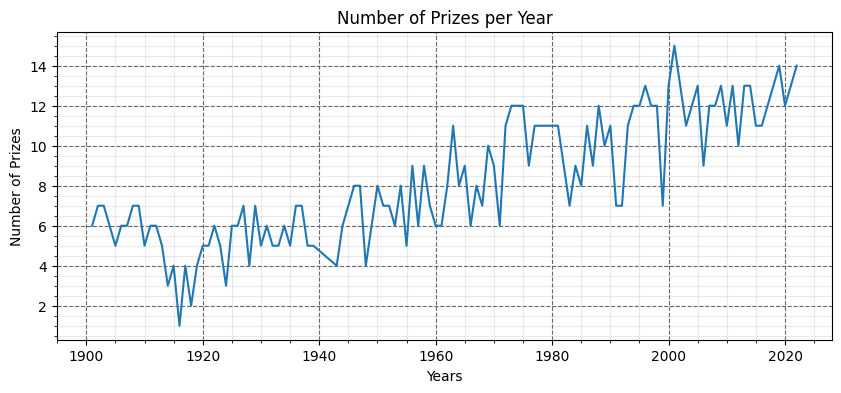

In [ ]:
plt.figure(figsize = (10,4))

sns.lineplot(data=temp_df, x="index", y="Year")

plt.xlabel("Years")
plt.ylabel("Number of Prizes")

plt.title("Number of Prizes per Year")

plt.grid(visible=True, which='major', color='#666666', linestyle='--')

plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [ ]:
df1 = df.groupby("Year")["Laureate_Id"].count().cumsum().reset_index()
df1

,Year,Laureate_Id
0,1901,6
1,1902,13
2,1903,20
3,1904,26
4,1905,31
...,...,...
114,2018,936
115,2019,950
116,2020,962
117,2021,975


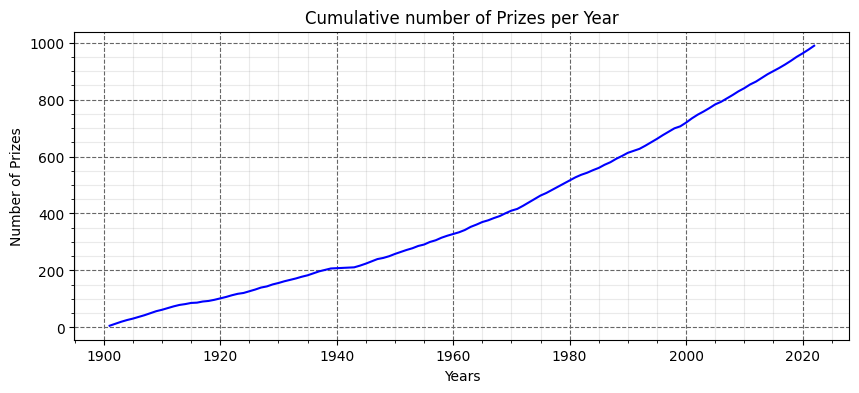

In [ ]:
plt.figure(figsize = (10,4))

plt.plot(df1["Year"], df1["Laureate_Id"], color="blue")
plt.xlabel("Years")
plt.ylabel("Number of Prizes")

plt.title("Cumulative number of Prizes per Year")

plt.grid(visible=True, which='major', color='#666666', linestyle='--')

plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [ ]:
df["Category"].value_counts()

medicine      225
physics       222
chemistry     191
peace         140
literature    119
economics      92
Name: Category, dtype: int64

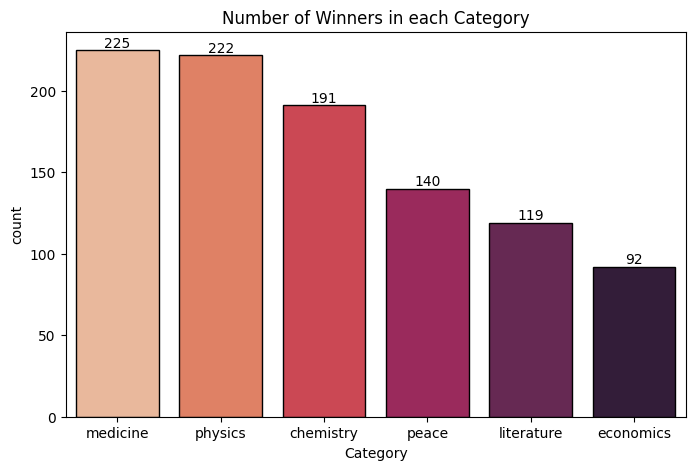

In [ ]:
plt.figure(figsize = (8,5))

ax = sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index, palette = sns.color_palette("rocket_r"), edgecolor='black')

for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Number of Winners in each Category")
plt.show()

Podemos observar que a maioria dos Prêmios Nobel são concedidos nas áreas de Medicina e Física.

Os Prêmios Nobel de Economia foram concedidos a partir do ano de 1969. Portanto, o total de premiados nesta categoria é baixo.

#3.3 Gender Representation in Nobel Prize.


In [ ]:
# Removendo 'org' de nossa coluna de gênero.
temp_df = df[df["Gender"]!="org"]

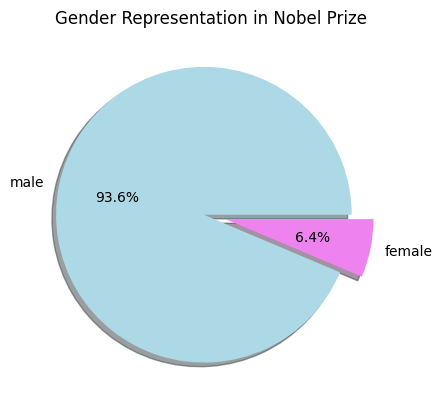

In [ ]:
# Gerando um gráfico de setores (pie chart) para analisar a porcentagem de laureados do sexo masculino e feminino.
freq = temp_df["Gender"].value_counts()
keys = freq.keys().to_list()
counts = freq.to_list()

color = ["lightblue", "violet"]
explode = [0.05, 0.1]

plt.pie(x=counts, labels=keys, autopct="%1.1f%%", colors = color, explode = explode, shadow=True)
plt.title("Gender Representation in Nobel Prize")
plt.show()

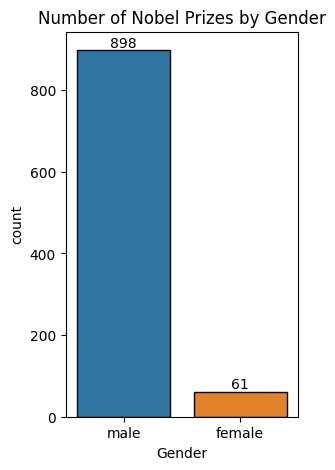

In [ ]:
# Gerando um gráfico de contagem (countplot) para verificar o número de laureados do sexo masculino e feminino.
plt.figure(figsize=(3,5))
ax = sns.countplot(data=temp_df, x="Gender", edgecolor='black')

for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Number of Nobel Prizes by Gender")
plt.show()

In [ ]:
# Análise adicional das laureadas femininas.
df_female = df[df["Gender"]=="female"]

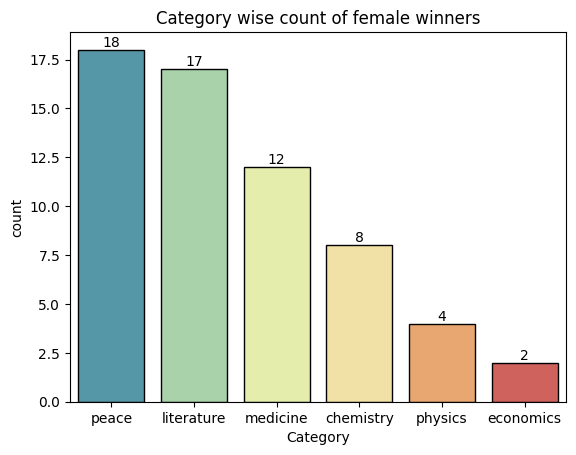

In [ ]:
# Gerando um gráfico de contagem (countplot) para descobrir as categorias em que as laureadas "femininas" recebem o prêmio.
ax = sns.countplot(data=df_female, x="Category", order=df_female["Category"].value_counts().index, palette=sns.color_palette("Spectral_r"), edgecolor='black')

for label in ax.containers:
    ax.bar_label(label)
plt.title("Category wise count of female winners")
plt.show()

Podemos observar que há uma grande disparidade entre o número de laureados masculinos e femininos.
Dos 959 laureados individuais, existem 898 laureados masculinos (93,6%) e apenas 61 laureadas femininas (6,4%).
As laureadas femininas ganharam principalmente Prêmios Nobel nas categorias "Paz" e "Literatura".

# 3.4 Analyisis of Laureate types.

Individuals or Organizations

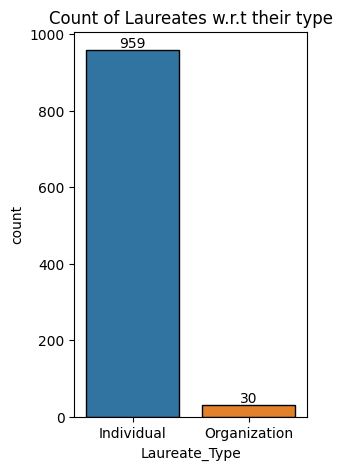

In [ ]:
plt.figure(figsize=(3,5))
ax = sns.countplot(data=df, x="Laureate_Type", edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Count of Laureates w.r.t their type")
plt.show()

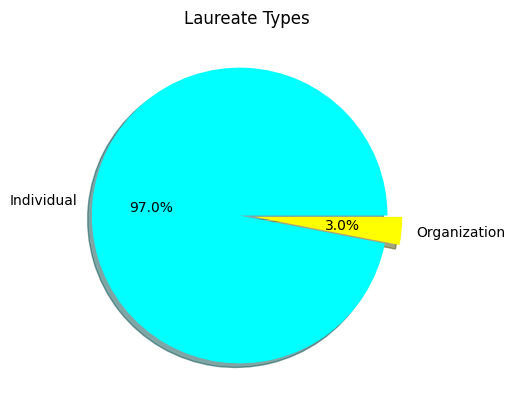

In [ ]:
freq = df["Laureate_Type"].value_counts()
keys = freq.keys().to_list()
counts = freq.to_list()

color = ["aqua", "yellow"]
explode = [0.05, 0.05]

plt.pie(x=counts, labels=keys, autopct="%1.1f%%", colors = color, explode = explode, shadow=True)
plt.title("Laureate Types")
plt.show()

In [ ]:
df_org = df[df["Laureate_Type"] == "Organization"]

In [ ]:
df_org["Category"].value_counts()

peace    30
Name: Category, dtype: int64

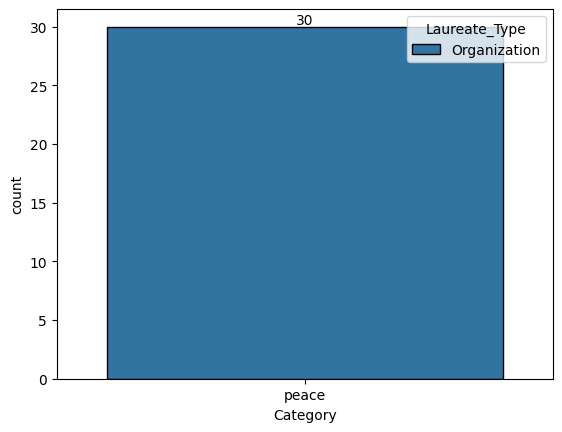

In [ ]:
ax = sns.countplot(data=df_org, x="Category", hue="Laureate_Type", order=df_org["Category"].value_counts().index, edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Podemos observar que uma grande maioria dos vencedores do Prêmio Nobel são indivíduos (97%).

Todas as organizações que ganharam o Prêmio Nobel o receberam na categoria "Paz".

#3.5 Análise da nacionalidade

Analisando o país de nascimento dos laureados com o Prêmio Nobel.

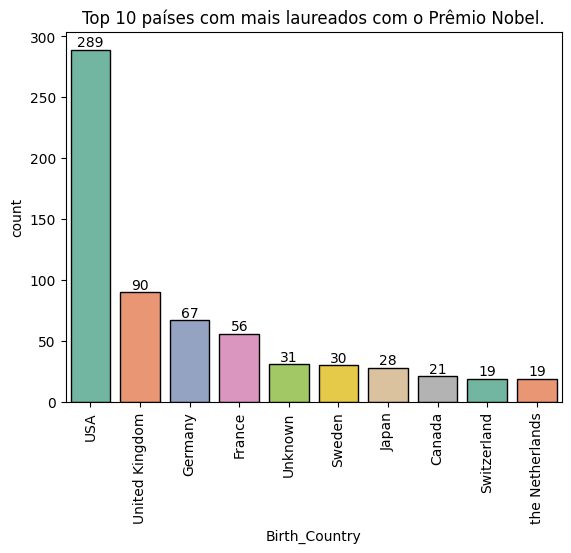

In [ ]:
# Gerando um gráfico de contagem (countplot) para mostrar os 10 principais países que produziram o maior número de laureados com o Prêmio Nobel.
ax = sns.countplot(data=df, x="Birth_Country", order=df["Birth_Country"].value_counts().head(10).index, palette=sns.color_palette("Set2"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.title("Top 10 países com mais laureados com o Prêmio Nobel.")
plt.show()

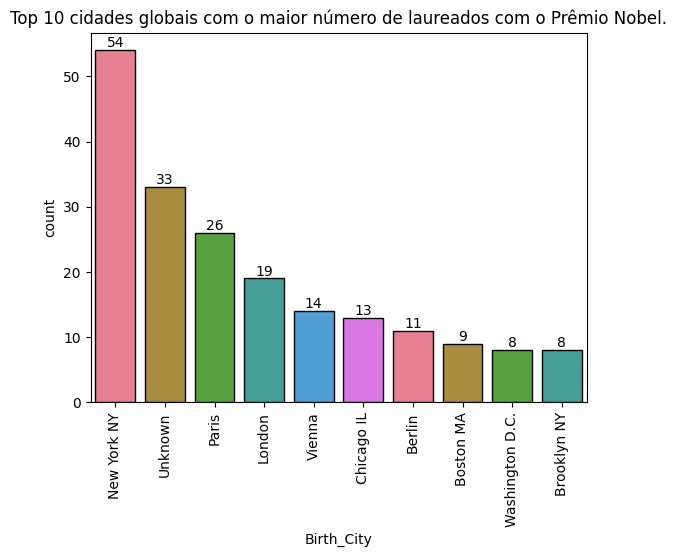

In [ ]:
# Gerando um gráfico de contagem (countplot) para mostrar as 10 principais cidades que produziram o maior número de laureados com o Prêmio Nobel.
ax = sns.countplot(data=df, x="Birth_City", order=df["Birth_City"].value_counts().head(10).index, palette=sns.color_palette("husl"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.title("Top 10 cidades globais com o maior número de laureados com o Prêmio Nobel.")
plt.show()

In [ ]:
# Realizando uma análise adicional dos laureados nascidos nos Estados Unidos.
df_usa = df[df["Birth_Country"]=="USA"]

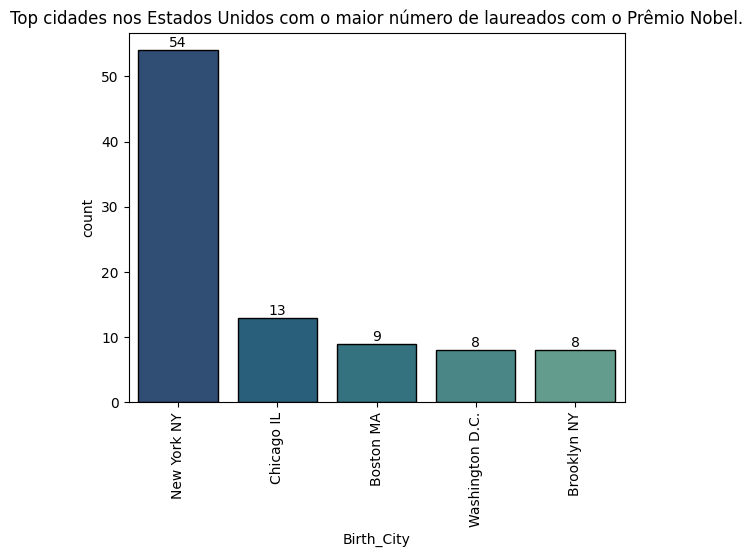

In [ ]:
ax = sns.countplot(data=df_usa, x="Birth_City", order=df_usa["Birth_City"].value_counts().head().index, palette=sns.color_palette("crest_r"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.title("Top cidades nos Estados Unidos com o maior número de laureados com o Prêmio Nobel.")
plt.show()

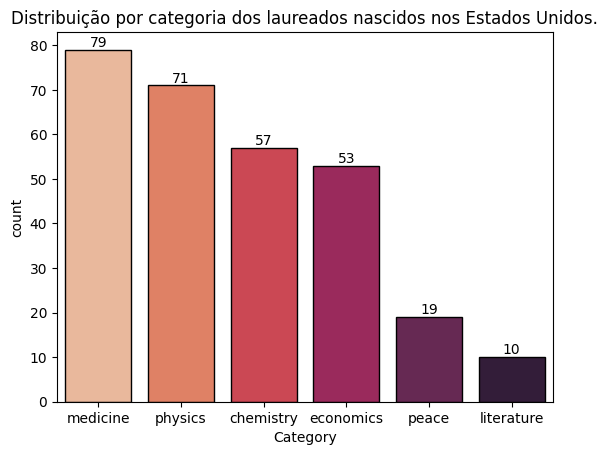

In [ ]:
ax = sns.countplot(data=df_usa, x="Category", order=df_usa["Category"].value_counts().index, palette=sns.color_palette("rocket_r"), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Distribuição por categoria dos laureados nascidos nos Estados Unidos.")
plt.show()

Podemos observar que os Estados Unidos produziram a grande maioria dos laureados com o Prêmio Nobel. Ao analisar as cidades que produziram a maioria dos laureados, observamos que a maioria deles nasceu em Nova York (EUA).

As top 5 principais cidades nos Estados Unidos que produziram a maioria dos laureados são Nova York, Chicago, Boston, Washington DC e Brooklyn.

Ao analisar ainda mais os laureados nascidos nos Estados Unidos, podemos observar que a maioria deles ganhou os prêmios Nobel na categoria de "Medicina", seguida de perto pela categoria de "Física".

#3.6 Analysis of Affiliated Organizations.

In [ ]:
# Filtrando o conjunto de dados para evitar os dados com valores desconhecidos para as organizações afiliadas.
df_aff = df[df["Organization_Name"] != "None"]

In [ ]:
df_aff.shape
# Observe que temos 727 laureados que possuem afiliações com alguma organização.

(727, 21)

In [ ]:
df_aff["Organization_Name"].value_counts().head(10)

University of California                        36
Harvard University                              27
Stanford University                             22
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           19
California Institute of Technology (Caltech)    17
Columbia University                             17
Princeton University                            17
University of Cambridge                         17
Rockefeller University                          13
Name: Organization_Name, dtype: int64

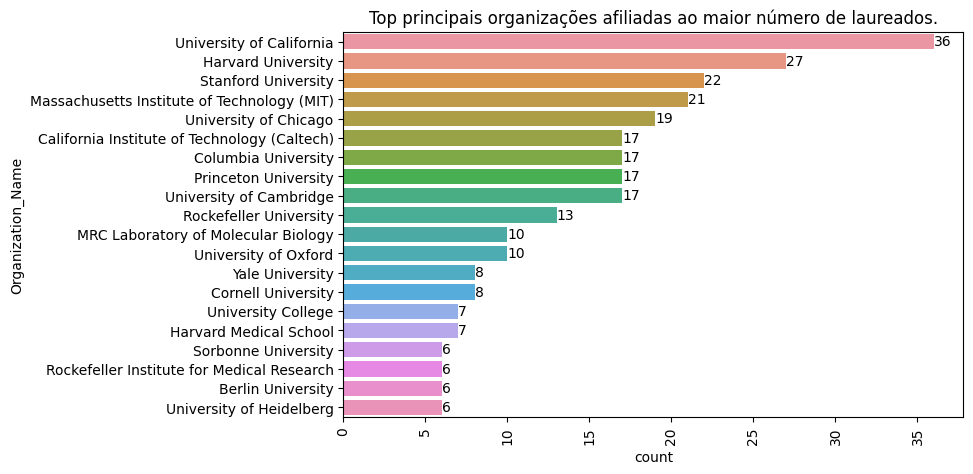

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_aff, y="Organization_Name", order=df_aff["Organization_Name"].value_counts().head(20).index)
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.title("Top principais organizações afiliadas ao maior número de laureados.")
plt.show()

Podemos observar que a "University of California", "Harvard University", "Stanford University" e "MIT" são as principais organizações com as quais os laureados com o Prêmio Nobel estão afiliados.

#3.7 Compartilhamento de Prêmios

O Prêmio Nobel pode ser dividido entre até 4 pessoas que tenham contribuído para a solução final.

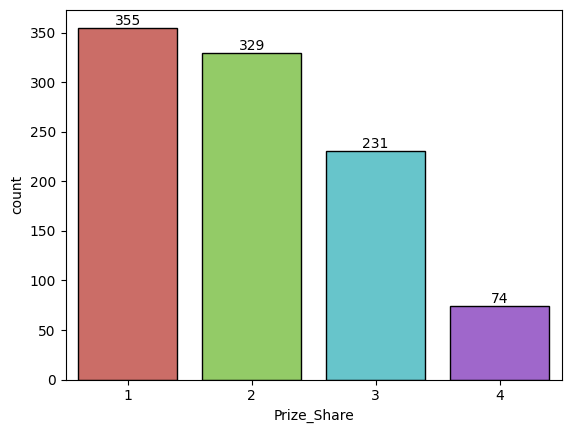

In [ ]:
ax = sns.countplot(data=df, x="Prize_Share", palette=sns.color_palette("hls",4), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

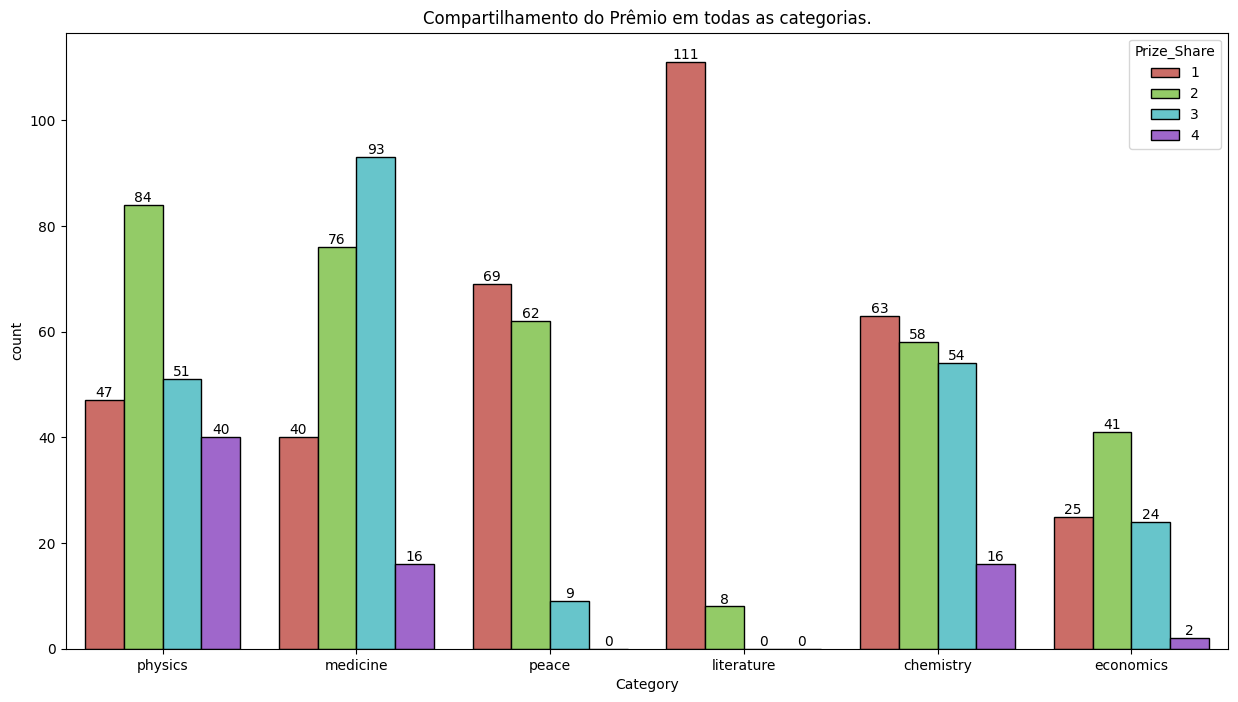

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df, x="Category", hue="Prize_Share", palette = sns.color_palette("hls", 4), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Compartilhamento do Prêmio em todas as categorias.")
plt.show()


Ao analisar os gráficos acima, podemos observar que o número de prêmios Nobel ganhos por laureados individuais ainda é o maior.

Considerando que, geralmente, as frutas mais baixas são colhidas primeiro, é possível que o compartilhamento do prêmio tenha aumentado nos tempos contemporâneos devido aos problemas se tornarem cada vez mais difíceis, a ponto de uma única pessoa não conseguir descobrir completamente uma solução por conta própria.

Após uma análise mais aprofundada do compartilhamento do prêmio em todas as categorias, podemos observar que:

* No campo da Física, a maioria dos prêmios Nobel é ganha por duas pessoas que trabalham juntas.

* No campo da Medicina, a maioria dos prêmios Nobel é ganha por três pessoas que trabalham juntas.

* No campo da Paz, a maioria dos prêmios Nobel é ganha por indivíduos solo, seguido de perto por duas pessoas que trabalham juntas.

* No campo da Literatura, a criatividade individual reina supremamente e a maioria dos prêmios Nobel é ganha por indivíduos solo.

* No campo da Química, a maioria dos prêmios Nobel é ganha por laureados individuais, mas o número de prêmios compartilhados entre **2 e 3** pessoas também é muito próximo.

* No campo da Economia, a maioria dos prêmios é ganha por duas pessoas que trabalham juntas.

#3.8 Analisando a idade dos laureados quando ganharam o Prêmio Nobel.

* Vamos analisar apenas a idade de indivíduos que ganharam o Prêmio.

In [ ]:
df_ind = df[df["Laureate_Type"]=="Individual"]

In [ ]:
# Encontrando a idade média geral dos laureados.
mean_win_age = round(df_ind["Win_Age"].mean(), 2)
mean_win_age

60.16

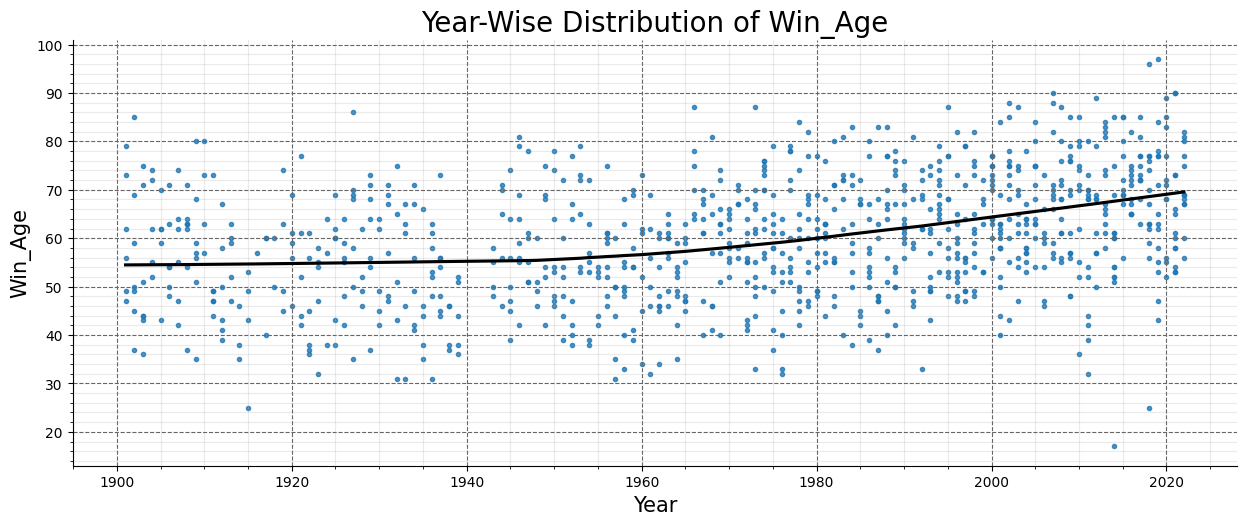

In [ ]:
# Gerando um gráfico de lmplot para mostrar a distribuição da idade de vitória dos laureados ao longo dos anos.
g=sns.lmplot(data=df_ind, x="Year", y="Win_Age", aspect=2.5, lowess=True, markers=".", line_kws={'color' : 'black'})
g.set_axis_labels("Year", "Win_Age", fontsize=15)
plt.title("Year-Wise Distribution of Win_Age", fontdict={'fontsize':20})
plt.grid(visible=True, which='major', color='#666666', linestyle='--')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


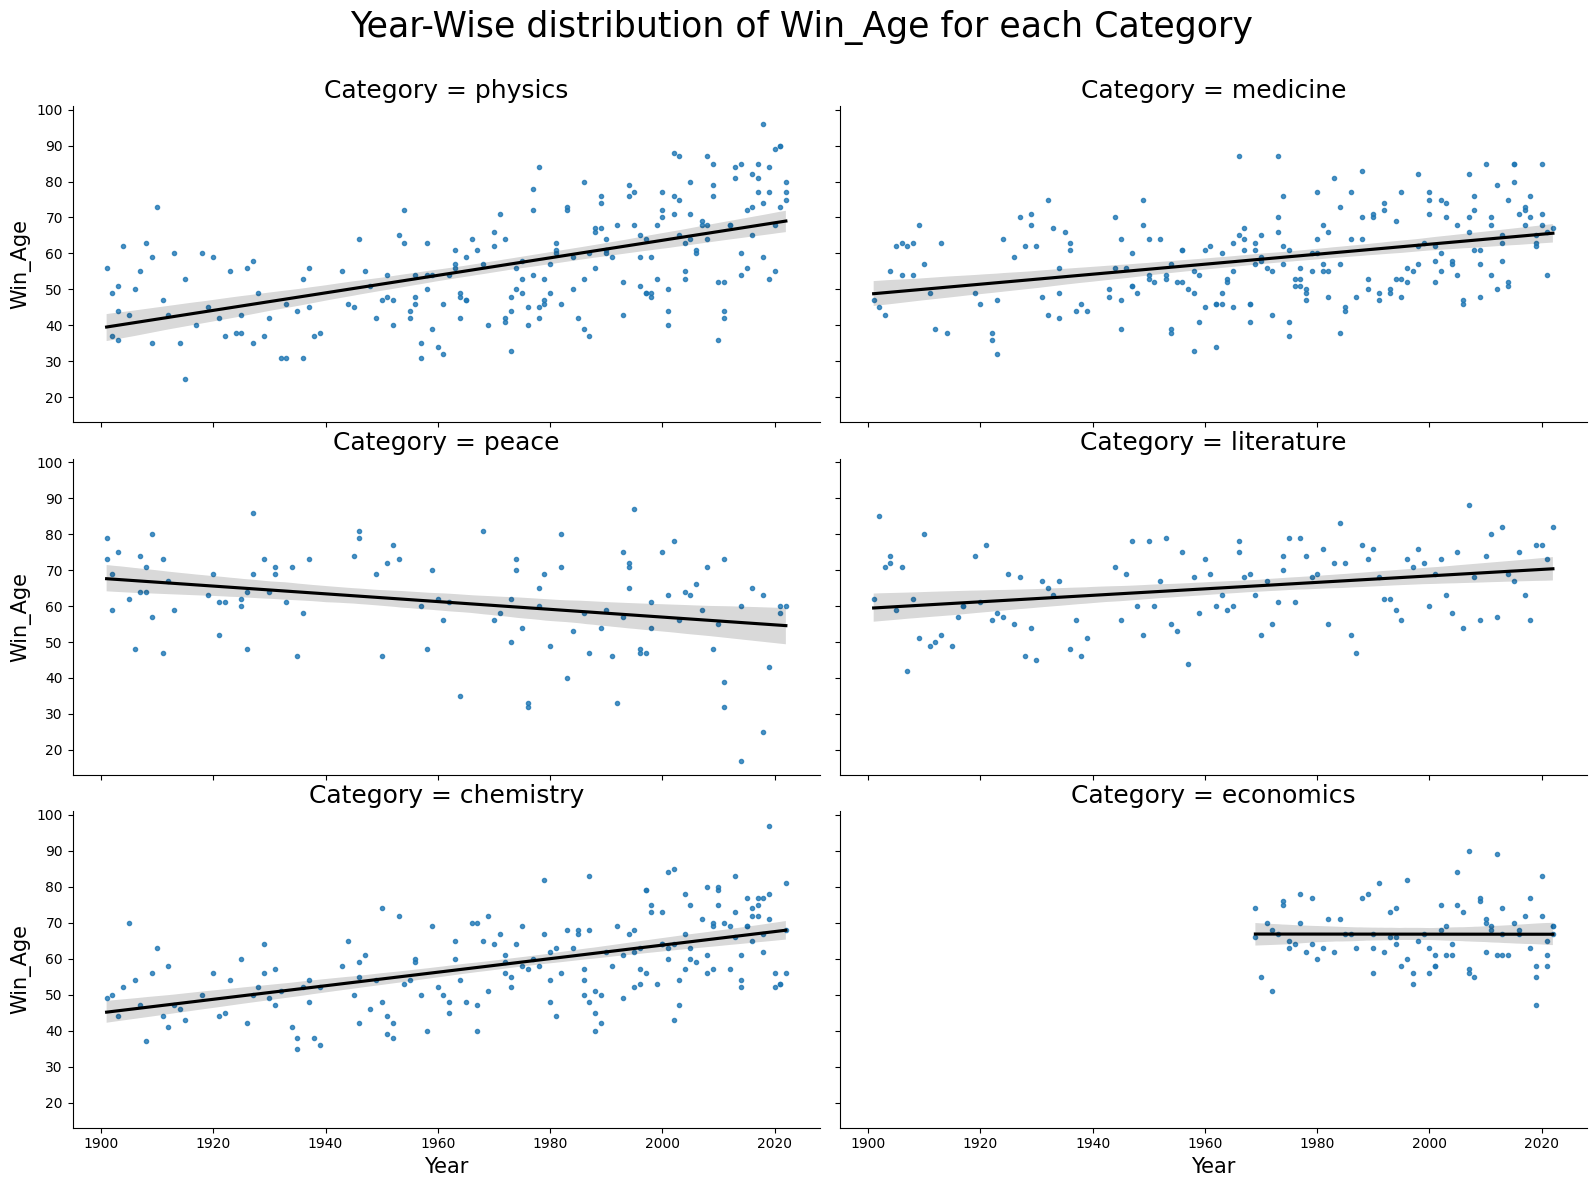

In [ ]:
# Aprimorando o gráfico acima para todas as categorias.
g = sns.lmplot(data=df_ind, x="Year", y="Win_Age", col="Category", markers=".", col_wrap=2, height=4, aspect=2, line_kws={'color':'black'})
g.set_titles(size=18)
g.set_axis_labels("Year", "Win_Age", fontsize=15)
plt.suptitle('Year-Wise distribution of Win_Age for each Category', fontsize=25)
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
# Calculando a idade média de vitória para todas as diferentes categorias.
temp_df = df_ind.groupby("Category")["Win_Age"].mean().sort_values(ascending=False).reset_index()
temp_df

,Category,Win_Age
0,economics,66.826087
1,literature,65.008403
2,peace,60.863636
3,chemistry,58.905759
4,medicine,58.631111
5,physics,57.099099


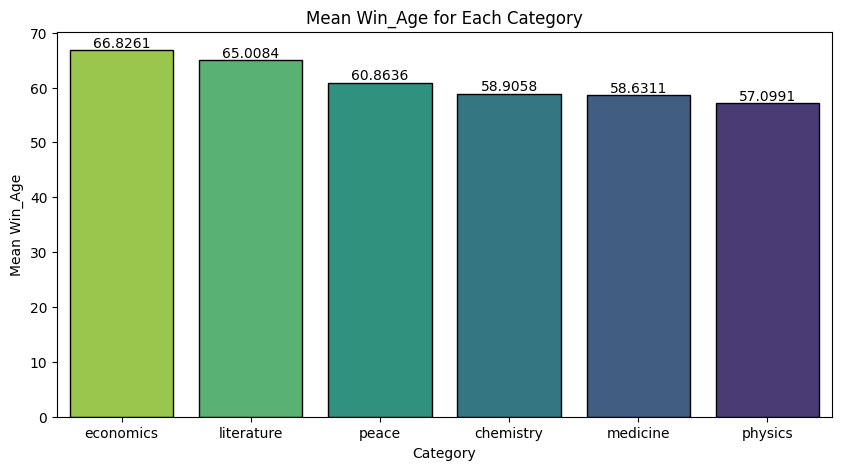

In [ ]:
# Plotando a Idade Média para todas as Categorias
plt.figure(figsize=(10,5))
ax = sns.barplot(data=temp_df, x='Category', y="Win_Age", palette=sns.color_palette(palette="viridis_r", n_colors=6, desat=1), edgecolor='black')
for label in ax.containers:
    ax.bar_label(label)
    
plt.ylabel("Mean Win_Age")
plt.title("Mean Win_Age for Each Category")
plt.show()

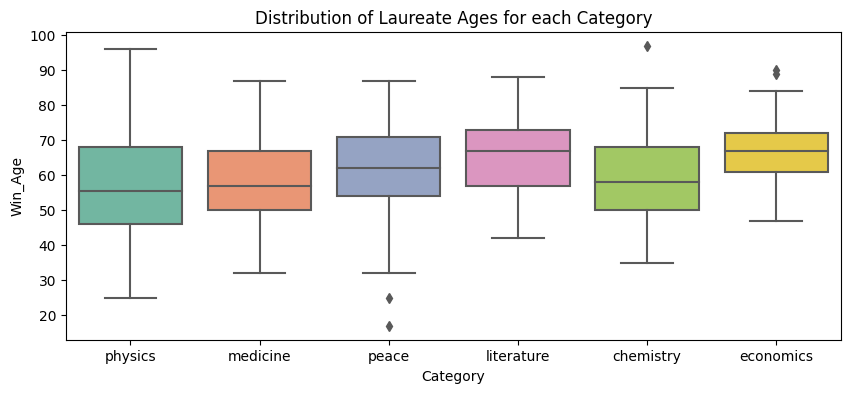

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_ind, x="Category", y="Win_Age", palette=sns.color_palette(palette="Set2", n_colors=6, desat=1))
plt.title("Distribution of Laureate Ages for each Category")
plt.show()

A idade média de vitória dos laureados do Nobel está aumentando ao longo do tempo, passando dos anos 50 no início de 1901 para os anos 60 no final de 2022.

Vamos registrar nossas observações sobre a idade média de vitória em todas as categorias:

* A idade média dos laureados aumentou ao longo do tempo nas categorias de Física, Química e Medicina.

* A idade média tem se mantido praticamente constante nas categorias de Literatura e Economia.
* A idade média diminuiu ao longo do tempo na categoria de Paz.

Observe que a idade média geral é mais alta para a categoria de Economia e mais baixa para a categoria de Física.

A partir do boxplot, parece que os laureados em Ciências Econômicas, Literatura e Paz são geralmente mais velhos do que aqueles que trabalham em Física, Química e Medicina.

# 4. Vamos ter algumas perguntas de curiosidades do nosso conjunto de dados.

4.1 Quem é o indivíduo mais jovem a ganhar o Prêmio Nobel?

In [ ]:
mask = (df_ind["Win_Age"] == df_ind["Win_Age"].min())
df_ind[mask].loc[:, ["Year", "Fullname", "Win_Age", "Category"]]

,Year,Fullname,Win_Age,Category
877,2014,Malala Yousafzai,17,peace


* O laureado mais jovem a ganhar o cobiçado Prêmio Nobel foi Malala Yousafzai, que ganhou na categoria de Paz em 2014, aos 17 anos de idade.

4.2 Who is the oldest Individual to win the Nobel Prize?

In [ ]:
mask = (df_ind["Win_Age"] == df_ind["Win_Age"].max())
df_ind[mask].loc[:, ["Year", "Fullname", "Win_Age", "Category"]]

,Year,Fullname,Win_Age,Category
949,2019,John Goodenough,97,chemistry


* O laureado mais velho a ganhar o cobiçado Prêmio Nobel foi John Goodenough, que ganhou na categoria de Química em 2019, aos 97 anos de idade.

4.3 Quais indivíduos ganharam o Prêmio Nobel mais de uma vez?

In [ ]:
df_ind["Fullname"].value_counts()[df_ind["Fullname"].value_counts() > 1]


Marie Curie         2
Linus Pauling       2
John Bardeen        2
Frederick Sanger    2
Barry Sharpless     2
Name: Fullname, dtype: int64

* Cinco laureados individuais, "Marie Curie", "Linus Pauling", "John Bardeen", "Frederick Sanger" e "Barry Sharpless", ganharam o cobiçado Prêmio Nobel em DUAS ocasiões.

4.4 Quais organizações ganharam o Prêmio Nobel mais de uma vez?

In [ ]:
df_org["Fullname"].value_counts()[df_org["Fullname"].value_counts() > 1]

International Committee of the Red Cross                        3
Office of the United Nations High Commissioner for Refugees     2
Name: Fullname, dtype: int64

Duas organizações ganharam o cobiçado Prêmio Nobel em mais de uma ocasião.

* O Comitê Internacional da Cruz Vermelha ganhou o Prêmio Nobel em 3 ocasiões.

* O Alto Comissariado das Nações Unidas para os Refugiados ganhou o Prêmio Nobel em 2 ocasiões.




4.5 Qual organização ganhou o Prêmio Nobel na sua idade mais jovem?

In [ ]:
df_org[df_org["Win_Age"] == df_org["Win_Age"].min()].loc[:, ["Year", "Category", "Fullname", "Laureate_Type", "Birth_Year", "Win_Age"]]


,Year,Category,Fullname,Laureate_Type,Birth_Year,Win_Age
890,2015,peace,National Dialogue Quartet,Organization,2013,2


* O Quarteto de Diálogo Nacional ganhou o Prêmio Nobel da Paz em 2015, apenas dois anos após ser criado em 2013.

#Obrigado !!